In [64]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings("ignore")
#!pip install plotnine
import plotnine as pn


In [65]:
cdnow = pd.read_csv('data/CDNOW_master.txt', sep='\s+',names=['customer_id','date','quantity','price'])

In [66]:
cdnow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  69659 non-null  int64  
 1   date         69659 non-null  int64  
 2   quantity     69659 non-null  int64  
 3   price        69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [67]:
cdnow

,customer_id,date,quantity,price
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
...,...,...,...,...
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12


In [68]:
#we need to change the date format
cdnow_final = cdnow.assign(date = lambda x:x['date'].astype(str)).assign(date= lambda x: pd.to_datetime(x['date']))


In [69]:
cdnow_final

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
...,...,...,...,...
69654,23568,1997-04-05,4,83.74
69655,23568,1997-04-22,1,14.99
69656,23569,1997-03-25,2,25.74
69657,23570,1997-03-25,3,51.12


In [70]:
cdnow_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  69659 non-null  int64         
 1   date         69659 non-null  datetime64[ns]
 2   quantity     69659 non-null  int64         
 3   price        69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [71]:
# I'll use here the cohort analysis 
# customers who joined on a particular day

cohort_initial_purchase = cdnow_final.sort_values(['customer_id', 'date']).groupby('customer_id').first()

In [72]:
cohort_initial_purchase

,date,quantity,price
customer_id,,,
1,1997-01-01,1,11.77
2,1997-01-12,1,12.00
3,1997-01-02,2,20.76
4,1997-01-01,2,29.33
5,1997-01-01,2,29.33
...,...,...,...
23566,1997-03-25,2,36.00
23567,1997-03-25,1,20.97
23568,1997-03-25,1,22.97


In [73]:
cohort_initial_purchase['date'].min()

Timestamp('1997-01-01 00:00:00')

In [74]:
cohort_initial_purchase['date'].max()

Timestamp('1997-03-25 00:00:00')

In [75]:
cdnow_final.reset_index().set_index('date')

,index,customer_id,quantity,price
date,,,,
1997-01-01,0,1,1,11.77
1997-01-12,1,2,1,12.00
1997-01-12,2,2,5,77.00
1997-01-02,3,3,2,20.76
1997-03-30,4,3,2,20.76
...,...,...,...,...
1997-04-05,69654,23568,4,83.74
1997-04-22,69655,23568,1,14.99
1997-03-25,69656,23569,2,25.74


In [76]:
cdnow_final.reset_index().set_index('date')[['price']]

,price
date,
1997-01-01,11.77
1997-01-12,12.00
1997-01-12,77.00
1997-01-02,20.76
1997-03-30,20.76
...,...
1997-04-05,83.74
1997-04-22,14.99
1997-03-25,25.74


In [77]:
cdnow_final.reset_index().set_index('date')[['price']].resample( rule='MS').sum()

,price
date,
1997-01-01,299060.17
1997-02-01,379590.03
1997-03-01,393155.27
1997-04-01,142824.49
1997-05-01,107933.30
1997-06-01,108395.87
1997-07-01,122078.88
1997-08-01,88367.69
1997-09-01,81948.80


<AxesSubplot:xlabel='date'>

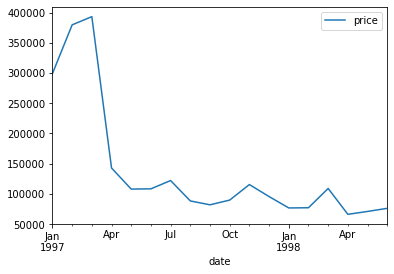

In [78]:
#high level Visualization on the customers purchase 
cdnow_final.reset_index().set_index('date')[['price']].resample( rule='MS').sum().plot()

In [79]:
# let's take a closer look at some individual customer and visualize thier purchase Behavior 
ids = cdnow_final['customer_id'].unique()


In [80]:
#lets chech the frst 10 customers
ids_selected = ids[0:10]

In [81]:
cdnow_ids_selected = cdnow_final[cdnow_final['customer_id'].isin(ids_selected)]

In [82]:
cdnow_ids_selected

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [83]:
cdnow_ids_selected.groupby(['customer_id','date']).sum()

quantity   price
customer_id date                        
1           1997-01-01         1   11.77
2           1997-01-12         6   89.00
3           1997-01-02         2   20.76
            1997-03-30         2   20.76
            1997-04-02         2   19.54
            1997-11-15         5   57.45
            1997-11-25         4   20.96
            1998-05-28         1   16.99
4           1997-01-01         2   29.33
            1997-01-18         2   29.73
            1997-08-02         1   14.96
            1997-12-12         2   26.48
5           1997-01-01         2   29.33
            1997-01-14         1   13.97
            1997-02-04         3   38.90
            1997-04-11         3   45.55
            1997-05-31         3   38.71
            1997-06-16         2   26.14
            1997-07-22         2   28.14
            1997-09-15         3   40.47
            1997-12-08         4   46.46
            1997-12-12         3   40.47
            1998-01-03         3   37.47
6           1997-01-01         1   20.99
7           1997-01-01         2   28.74
            1997-10-11         7   97.43
            1998-03-22         9  138.50
8           1997-01-01         1    9.77
            1997-02-13         1   13.97
            1997-06-17         3   45.29
            1997-07-03         2   36.76
            1997-11-16         8   53.42
            1997-12-25         1   13.99
            1998-03-29         2   24.46
9           1997-01-01         2   23.54
            1997-05-13         2   30.33
            1998-06-08         2   41.98
10          1997-01-21         3   39.31

In [84]:
cdnow_ids_selected.groupby(['customer_id','date']).sum().reset_index()

,customer_id,date,quantity,price
0,1,1997-01-01,1,11.77
1,2,1997-01-12,6,89.00
2,3,1997-01-02,2,20.76
3,3,1997-03-30,2,20.76
4,3,1997-04-02,2,19.54
5,3,1997-11-15,5,57.45
6,3,1997-11-25,4,20.96
7,3,1998-05-28,1,16.99
8,4,1997-01-01,2,29.33
9,4,1997-01-18,2,29.73


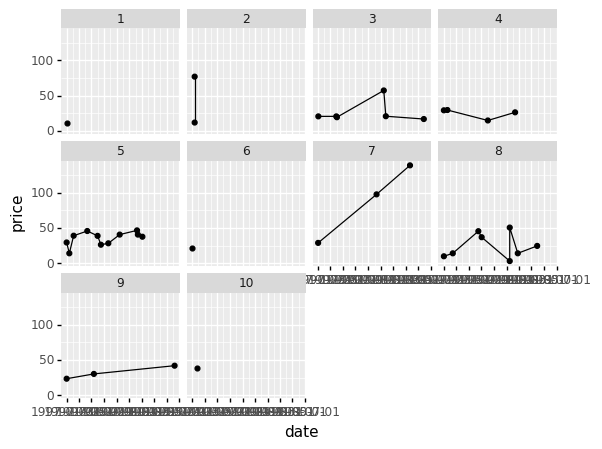

<ggplot: (8795712868910)>

In [85]:
pn.ggplot(pn.aes('date','price',group = 'customer_id'),data=cdnow_ids_selected)\
+pn.geom_line()\
+pn.geom_point()\
+pn.facet_wrap('customer_id')

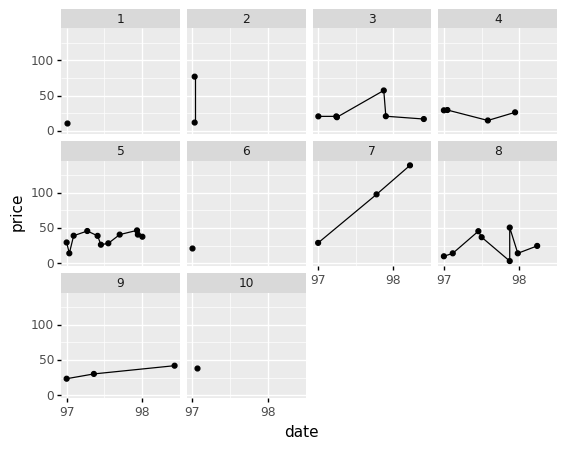

<ggplot: (8795685106911)>

In [86]:
#clean up the date
pn.ggplot(pn.aes('date','price',group = 'customer_id'),data=cdnow_ids_selected)\
+pn.geom_line()\
+pn.geom_point()\
+pn.facet_wrap('customer_id')\
+pn.scale_x_date(date_breaks = '1 year',date_labels = '%y')

In [87]:
#we want to answer two questions
#How much are customers going to spend in the next 90 days?
#What is the likelihood that a customer will buy something in the next 90 days?

#first approach is splitting by time
number_of_days = 90
maximum_date = cdnow_final['date'].max()

max_ninty_days = maximum_date - pd.to_timedelta(number_of_days,unit= 'd')

in_ninty_days = cdnow_final[cdnow_final['date'] <= max_ninty_days]


out_ninty_days = cdnow_final[cdnow_final['date'] > max_ninty_days]


In [88]:
max_ninty_days

Timestamp('1998-04-01 00:00:00')

In [89]:
maximum_date

Timestamp('1998-06-30 00:00:00')

In [90]:
#feature engineering using RFM(recency, frequency, monetary)

In [91]:
# Make Targets from out data ----

targets_df = out_ninty_days \
    .drop('quantity', axis=1) \
    .groupby('customer_id') \
    .sum() \
    .rename({'price': 'spend_90_total'}, axis = 1) \
    .assign(spend_90_flag = 1)

In [92]:
targets_df

,spend_90_total,spend_90_flag
customer_id,,
3,16.99,1
9,41.98,1
25,73.43,1
29,48.45,1
31,117.99,1
...,...,...
23529,40.56,1
23534,10.48,1
23555,77.44,1


In [93]:
# Make Recency (Date) Features from in data ----

max_date = in_ninty_days['date'].max()

recency_features_df = in_ninty_days \
    [['customer_id', 'date']] \
    .groupby('customer_id') \
    .apply(
        lambda x: (x['date'].max() - max_date) / pd.to_timedelta(1, "day")
    ) \
    .to_frame() \
    .set_axis(["recency"], axis=1)

recency_features_df



,recency
customer_id,
1,-455.0
2,-444.0
3,-127.0
4,-110.0
5,-88.0
...,...
23566,-372.0
23567,-372.0
23568,-344.0


In [94]:
# Make Frequency (Count) Features from in data ----

frequency_features_df = in_ninty_days \
    [['customer_id', 'date']] \
    .groupby('customer_id') \
    .count() \
    .set_axis(['frequency'], axis=1)

frequency_features_df



,frequency
customer_id,
1,1
2,2
3,5
4,4
5,11
...,...
23566,1
23567,1
23568,3


In [95]:
# Make Price (Monetary) Features from in data ----

price_features_df = in_ninty_days \
    .groupby('customer_id') \
    .aggregate(
        {
            'price': ["sum", "mean"]
        }
    ) \
    .set_axis(['price_sum', 'price_mean'], axis = 1)

price_features_df

,price_sum,price_mean
customer_id,,
1,11.77,11.770000
2,89.00,44.500000
3,139.47,27.894000
4,100.50,25.125000
5,385.61,35.055455
...,...,...
23566,36.00,36.000000
23567,20.97,20.970000
23568,121.70,40.566667


In [96]:
# 3.3 COMBINE FEATURES ----

features_df = pd.concat(
    [recency_features_df, frequency_features_df, price_features_df], axis = 1
) \
    .merge(
        targets_df, 
        left_index  = True, 
        right_index = True, 
        how         = "left"
    ) \
    .fillna(0)

In [97]:
features_df

,recency,frequency,price_sum,price_mean,spend_90_total,spend_90_flag
customer_id,,,,,,
1,-455.0,1,11.77,11.770000,0.00,0.0
2,-444.0,2,89.00,44.500000,0.00,0.0
3,-127.0,5,139.47,27.894000,16.99,1.0
4,-110.0,4,100.50,25.125000,0.00,0.0
5,-88.0,11,385.61,35.055455,0.00,0.0
...,...,...,...,...,...,...
23566,-372.0,1,36.00,36.000000,0.00,0.0
23567,-372.0,1,20.97,20.970000,0.00,0.0
23568,-344.0,3,121.70,40.566667,0.00,0.0


In [98]:
#Future work adding machine learning